# PYTHON VERSION

In [1]:
import sys
print(sys.version)

3.11.4 (main, Jul  5 2023, 13:45:01) [GCC 11.2.0]


This library contains the finite Markov chain *simulator* **`MarkovChain`**. 

1. How to create a new chain.
2. How to simulate the steps of the chain in state space.



### Example

The cell below simulates the first 10 steps of a chain moving through state space 
$X = \{0, 1, 2, 3, 4\}$ with a state transition probability matrix:

$$
P = 
\begin{pmatrix}
0 & 1/2 & 1/2 & 0 & 0 \\
1/3 & 0 & 0 & 2/3 & 0 \\
0 & 0 & 1 & 0 & 0 \\
1/2 & 0 & 0 & 1/2 & 0 \\
0 & 0 & 0 & 0 & 1 
\end{pmatrix}
$$

and initial distribution: 

$$ \pi_0 = (1, 0, 0, 0, 0, 0 ) $$

That is, the chain starts from state 0 (1st line) with probability 1.

In [2]:
from Modules.simple_markov_chain_lib import MarkovChain  # import markov chain simulator

# Transition Table
markov_table = {
    0: {1: .5, 2: .5},  # from state 0 we move to state 1 with prob 0.5 and to state 2 with 0.5
    1: {0: 1/3, 3: 2/3},
    2: {2: 1.},
    3: {0: .5, 3: .5},
    4: {4: 1.}
}

# Initial Distribution
init_dist = {0: 1.}  # we start from state 0 with probability 1

mc = MarkovChain(markov_table, init_dist)

mc.start()
print("At time {} the chain is in state {}".format(mc.steps, mc.running_state))
for i in range(10):
    mc.move()
    print("At time {} the chain is in state {}".format(mc.steps, mc.running_state))
    
    

At time 0 the chain is in state 0
At time 1 the chain is in state 1
At time 2 the chain is in state 3
At time 3 the chain is in state 0
At time 4 the chain is in state 2
At time 5 the chain is in state 2
At time 6 the chain is in state 2
At time 7 the chain is in state 2
At time 8 the chain is in state 2
At time 9 the chain is in state 2
At time 10 the chain is in state 2


### Creating a new Markov chain

To create a new Markov chain we need to give the simulator 2 arguments:

1. `markov_table`: the transition probability table of the chain and
2. `init_dist` (optional): the initial distribution of the chain.

In [3]:
#### Transition probability table (`markov_table`)
# Transition Table
markov_table = {
    0: {1: .5, 2: .5},  # from state 0 we move to state 1 with prob 0.5 and to state 2 with 0.5
    1: {0: 1/3, 3: 2/3},
    2: {2: 1.},
    3: {0: .5, 3: .5},
    4: {4: 1.}
}

Often the transition tables are "sparse", most of the time
we only write the non-zero ones.

Each and every "internal" dictionary (`dict`) describes a probability mass function as follows:

* `key` = state (not necessarily e a number)
* `value` = probability (must be a number in the range $[0, 1]$)

Those states **not** contained in the dictionary are considered to have zero probability.
The state space is defined by the keys of the "external" dictionary (in our example `0, 1, 2, 3, 4`).

#### Initial distribution (`init_dist`)

The initial distribution is defined in a similar way as the probability mass function.

In [4]:
# Initial Distribution
init_dist = {0: 1.}  # we start from state 0 with probability 1

In [5]:
### Random Walk in the State Space

mc.start()

After the walk is initiated we can extract from the created Markov chain 2 pieces of information.

1. **`steps`**: what step is it in ($n$ in $\{X_n\}_{n \in \mathbb{N}_0}$).
2. **`running_state`**: what state ($X_n$) is in

This exercise uses the Monte Carlo method to estimate the probability of the **example** above for $p = \frac{1}{6}$.

To simulate the problem we will need:

1. Load the `markov_chain` simulator from the `simple_markov_chain_lib.py` file.
2. Create the transition probability matrix and the initial distribution.
3. Create a new chain.

These steps are implemented in the following code cell:

In [6]:
import random
random.seed(2018)  # for reproducibility

p = 1/6

# A dictionary for the initial distibution. 
# We prescribe the initial distribution
init_probs = {1: 1.0} 
 
# A dictionary for the transition probability  matrix. 
# Every state-key corresponds to a list with tuples of (Next_State,Probability) 
markov_table = {
    1: {2: 1.},
    2: {2: 2/3, 3: 1/3},
    3: {1: p, 2: 1-p}
}
 
# Ok... we are ready know
# Let's construct a Markov Chain. So let's call the constructor
mc = MarkovChain(markov_table, init_probs)

Making use of the **`mc`** chain we can move on to simulations.

Specifically, we will estimate the probability $\mathbb{P}_1[X_{40}=1]=\mathbb{P}\left[X_{40} = 1\mid X_0 = 1\right]$. 
To do this, we will run the chain many times (parameter `N`) always starting from state `1` and count how many times the chain was in state `1` after `40` steps (parameter `steps`), i.e. how many times the event $X_{40}=0$ occurred. Each time we execute the **`for`** loop below we get an independent sample of r.v. $Y$ which has value 1 if $X_{40}=1$, and value 0 if $X_{40}\neq 1$. The law of large numbers yields:
$$ \lim_{N\to\infty}\frac{Y_1+\cdots+Y_N}{N}=\mathbb{E}_1[Y]=\mathbb{P}_1[X_{40}=1].$$
Therefore, when `N` is large, the percentage of times in which the event $${X_{40}=1}$$ occurred is a good estimate of the probability $$\mathbb{P}_1[X_{40}=1]$$. The quantity $\hat{p}_N$ called `phat` in the code below is as the Monte Carlo estimator of the probability $\mathbb{P}_1[X_{40}=1]$.

In [7]:
## Experiment parameters
N = 1000     # number of samples
steps = 40   # the target time
counter = 0  # to count the number of times the event {X_40  = 0} occurs

## Simulation
for i in range(N):
    mc.start()  # new experiment
    for j in range(steps):  mc.move()
    if mc.running_state == 1:  counter += 1

phat = counter / N

print(
    """
    We executed {0} times the first {1} steps of the markov chain
    and we captured the running state in state one {2} times.
    So we estimate the Pr[X_{1} = 1 | X_0 = 1] to be {3}
    """.format(N, steps, counter, phat)
)


    We executed 1000 times the first 40 steps of the markov chain
    and we captured the running state in state one 37 times.
    So we estimate the Pr[X_40 = 1 | X_0 = 1] to be 0.037
    


Unlike the numerical estimators encountered in Numerical Analysis, $\hat{p}_N$ is a random variable. That checks out by rerunning the previous cell a few (10) times. 

The next piece of code generates a list of 100 samples from the standard normal distribution and calculates the sample mean and variance. 

In [8]:
import statistics as stat ## import the library statistics. We will use it to compute the mean and variance of our list
estimates=[] ## create the empty list estimates.
for i in range(100): estimates.append(random.gauss(0,1)) 
    ## in each of 100 runs generate a sample from the standard normal distribution and append it to the list estimates
print(
    """ 
    The sample mean is {0:.5f} and the sample variance is {1:.5f}
    """.format(stat.mean(estimates), stat.variance(estimates))
)
    ## compute the SAMPLE mean and variance of the elements in our list keeping only 5 decimal digits

 
    The sample mean is 0.00884 and the sample variance is 0.86819
    


## Example

In this example the variation of the absorption time of a Markov chain is studied.
In the cell below a Markov chain in the state space $\mathbb{X} = \{0, 1, 2, 3, 4\}$ is created, with a transition probability matrix

$$
P = 
\begin{pmatrix}
2/5 & 1/2 & 1/10 & 0 & 0 \\
1/3 & 0 & 0 & 2/3 & 0 \\
0 & 0 & 1 & 0 & 0 \\
1/2 & 1/8 & 0 & 1/4 & 1/8 \\
0 & 0 & 0 & 0 & 1 
\end{pmatrix}
$$

and initial distribution: 

$$ \pi_0 = (1, 0, 0, 0, 0, 0 ) .$$

In [9]:
# Transition Table
markov_table = {
    0: {1: .5, 2: .5},  # from state 0 we move to state 1 with prob 0.5 and to state 2 with 0.5
    1: {0: 1/3, 3: 2/3},
    2: {2: 1.},
    3: {0: .5, 3: .25, 4: .25},
    4: {4: 1.}
}

# Initial Distribution
init_dist = {0: 1.}  # we start from state 0 with probability 1

mc = MarkovChain(markov_table, init_dist)

Obviously states `2` and `4` are "absorbing". 
The `mc` chain can be used to estimate the absorption time of the chain.

The Monte Carlo estimator $E_N$ of the absorption time is the average of the absorption times in these $N$ samples.

In [10]:
sample_size = 2 ** 5  # Ν
running_total = 0

for i in range(sample_size):
    mc.start()
    while mc.running_state != 2 and mc.running_state != 4:
        mc.move()
    running_total += mc.steps  # steps it took to be absorbed

mc_estimate = running_total / sample_size
print("The estimated absorption time is %.2f steps" % mc_estimate)

The estimated absorption time is 2.53 steps


Remember that the estimator $E_N$ is a random variable. The purpose of this exercise is to find out computationally how the variance of $E_N$ is affected by the number of iterations $N$. It is expected that as $N$ grows the variance of $E_N$ falls, but this relationship can also be understood quantitatively.
## Application

Computation of the variance of the estimator $E_N$ for $N$ (`sample_size`) $2^5, \dots, 2^{12}$ and plotting of the graph of the function $Var(E_N)$ in normal and logarithmic scales. Wherever a line appears, an estimation of its slope is calculated.

 The sample variance is 1.90710 
 The sample variance is 1.46186 
 The sample variance is 1.07577 
 The sample variance is 0.90811 
 The sample variance is 0.74917 
 The sample variance is 0.63068 
 The sample variance is 0.54554 
The slope of the straight line is:  -0.298734742884496


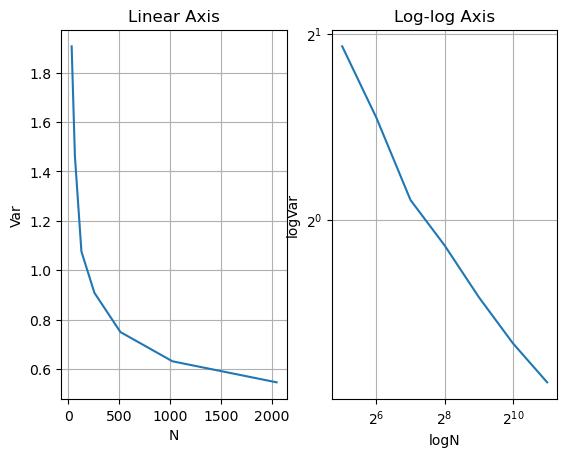

In [11]:
import numpy as np  # numerical computations library. We will call it np in our code
import matplotlib.pyplot as plt  # library for plotting. We will call it plt in our code

# Transition Table
markov_table = {
    0: {0: 2/5, 1: .5, 2: .1                },  # from state 0 we move to state 1 with prob 0.5 and to state 2 with 0.5
    1: {0: 1/3,               3: 2/3        },
    2: {               2: 1.                },
    3: {0: .5,                3: .25, 4: .25},
    4: {                              4: 1. }
}

# Initial Distribution
init_dist = {0: 1.}  # we start from state 0 with probability 1

mc = MarkovChain(markov_table, init_dist)

#------------------------------------------------------------------------------------------------------------------------------

M             = 30
estimates     = []
x             = []
y             = []

for k in range(5,12,1):
    sample_size   = 2 ** k  # Ν
    x.append(sample_size)
    for j in range(M):
        running_total = 0
        for i in range(sample_size):
            mc.start()
            while mc.running_state != 2 and mc.running_state != 4:
                mc.move()
            running_total += mc.steps  # steps it took to be absorbed

        mc_estimate = running_total / sample_size
        estimates.append(mc_estimate)  # array of length M, including the estimated absortion time of M iterations
    print(""" The sample variance is {0:.5f} """.format(stat.variance(estimates))) # print the Var for each and every sample size
    y.append(stat.variance(estimates))
    
#------------------------------------------------------------------------------------------------------------------------------
# Plots
plt.figure() 

# Right Axes
plt.subplot(1, 2, 1)  
plt.plot(x, y)
plt.xlabel('N')
plt.ylabel('Var')
plt.title('Linear Axis')
plt.grid(True)  

# Left Axes
plt.subplot(1, 2, 2) # select the 2nd subplot
plt.loglog(x, y)
plt.yscale("log",base=2) 
plt.xscale("log",base=2) 
plt.xlabel('logN')
plt.ylabel('logVar')
plt.title('Log-log Axis')
plt.grid(True)
#--------------------------------------------------------------------------
# Υπολογισμος κλισης προσεγγιστικα. 
from math import log
import matplotlib.pyplot as plt
z = np.polyfit([log(x1,2) for x1 in x],[log(y1,2) for y1 in y],1)
print("The slope of the straight line is: ", z[0])

<UL>
<LI>Given any equation of the form $$y=ax^k,$$ by taking the logarithm (of any base) of that equation we obtain
$$logy = klogx + loga.$$ However, by setting $X = logx$ and $Y = logy$ we obtain: $$Y = mX + b$$, where $m = k$ and $b = loga$, which is an equation of a straight line.</LI>

<LI>
After the above transformation, we obtain the equation: $$Y = mX + b$$, we have that $m = $k is the slope of the graph and $b = loga$ is the point of intersection with the $logy$ $(logx = 0)$ axis.</LI>

<LI>
The slope in the case: $$y=8x^3$$ is equal to 3 and in the case $$y=8x^2$$ is equal to 2 (it is equal to the exponents, respectively). The following block code aims to substantiate this claim.</LI>
</UL>
## Linear Regression

Numerical approximation of the slope of $$y=32x^3$$ in log-scale.

The slope of the straight line is:  2.9999999999999996


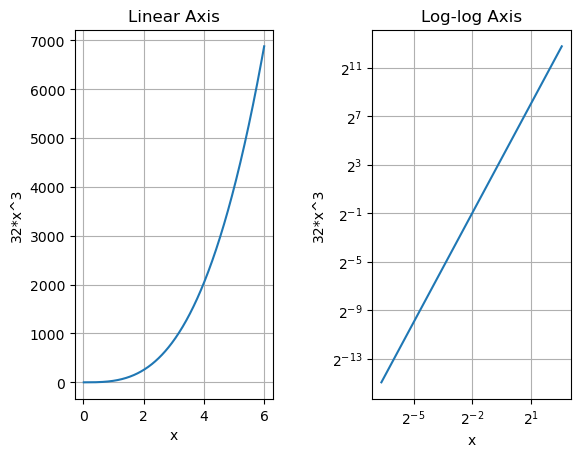

In [12]:
import numpy as np
import matplotlib.pyplot as plt
#--------------------------------------------------------------------------
start, end, step = 0.01, 6.0, 0.01
x = np.arange(start, end, step)  # x = [0.01, 0.02, ..., 5.99, 6.00]
# Compute f(x) = 32 * x^3 for every element of x
y = 32 * x**3
#--------------------------------------------------------------------------
plt.figure()

# Right Axes
plt.subplot(1, 2, 1)  # setup subplots 1-row, 2-cols, select the 1st
plt.plot(x, y)
plt.xlabel('x')
plt.ylabel('32*x^3')
plt.title('Linear Axis')
plt.grid(True)  # add grid-lines

# Left Axes
plt.subplot(1, 2, 2) # select the 2nd subplot
plt.loglog(x, y)
plt.yscale("log",base=2) 
plt.xscale("log",base=2) 
plt.xlabel('x')
plt.ylabel('32*x^3')
plt.title('Log-log Axis')
plt.grid(True)

plt.subplots_adjust(wspace = 0.5)  # specify the width space
#--------------------------------------------------------------------------
# Παρατηρουμε πως η κλιση υπολογιζεται ιση με 3 οπως ακριβως αναμενεται. 
from math import log
import matplotlib.pyplot as plt
z = np.polyfit([log(x1,2) for x1 in x],[log(y1,2) for y1 in y],1)
print("The slope of the straight line is: ", z[0])

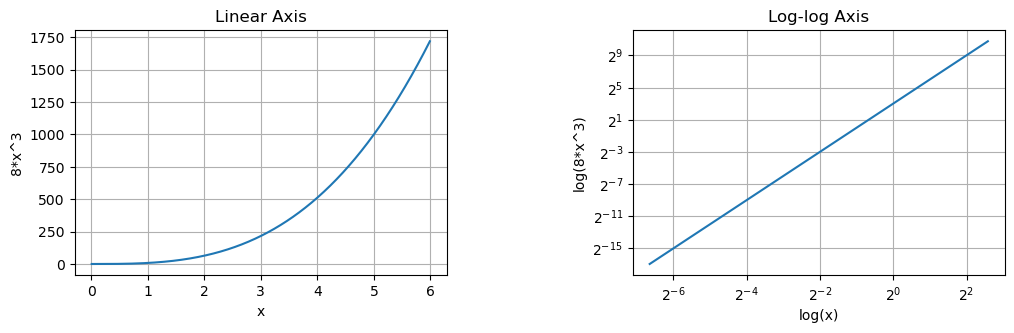

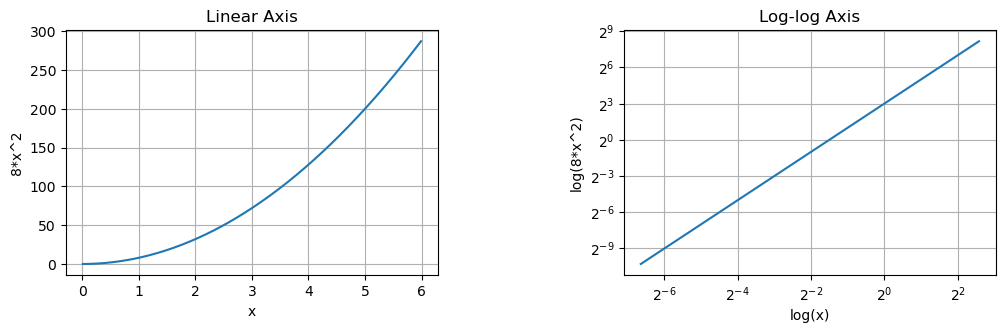

In [13]:
# to plot the results in the notebook:
%matplotlib inline
#------------------------------------------------------------------------------------------
# Create a list of real numbers from start to end by step
start, end, step = 0.01, 6.0, 0.01
x1 = np.arange(start, end, step)  # x1 = [0.01, 0.02, ..., 5.99, 6.00]
x2 = np.arange(start, end, step)
# Compute f(x) = 8 * x^3 & f(x) = 8 * x^2 for every element of x
y1 = 8 * x1**3
y2 = 8 * x2**2
#------------------------------------------------------------------------------------------
plt.figure(figsize=(12, 7))  # define figure size

# Linear
plt.subplot(2, 2, 1)  # setup subplots 1-row, 2-cols, select the 1st
plt.plot(x1, y1)
plt.xlabel('x')
plt.ylabel('8*x^3')
plt.title('Linear Axis')
plt.grid(True)  # add grid-lines

# Logarithmic
plt.subplot(2, 2, 2) # select the 2nd subplot
plt.loglog(x1, y1)
plt.yscale("log",base=2) 
plt.xscale("log",base=2) 
plt.xlabel('log(x)')
plt.ylabel('log(8*x^3)')
plt.title('Log-log Axis')
plt.grid(True)

plt.subplots_adjust(wspace = 0.5)  # specify the width space
#------------------------------------------------------------------------------------------
plt.figure(figsize=(12, 7))  # define figure size

# Linear
plt.subplot(2, 2, 3)  # setup subplots 1-row, 2-cols, select the 3rd
plt.plot(x2, y2)
plt.xlabel('x')
plt.ylabel('8*x^2')
plt.title('Linear Axis')
plt.grid(True)  # add grid-lines

# Logarithmic
plt.subplot(2, 2, 4) # select the 4th subplot
plt.loglog(x2, y2)
plt.yscale("log",base=2) 
plt.xscale("log",base=2) 
plt.xlabel('log(x)')
plt.ylabel('log(8*x^2)')
plt.title('Log-log Axis')
plt.grid(True)

plt.subplots_adjust(wspace = 0.5)  # specify the width space

![Markov Chain of Tennis Game](https://pbs.twimg.com/media/DpqZm0mW4AAxuWM.jpg)
## Appllication 

Using *Monte Carlo* an estimation is given for the probability of the serving player (`Player A`) to win, if the probability of him winning each point is $p = 0.6$. 

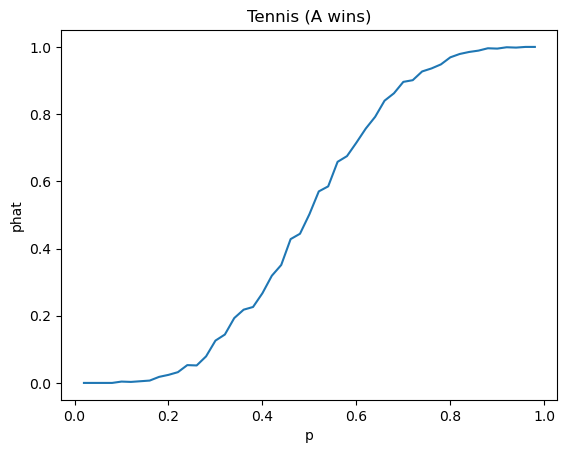

In [14]:
random.seed(2018)  
from Modules.simple_markov_chain_lib import MarkovChain
x = []
y = []
# range command inputs must be integers, later i will divide p with a 100...
for p1 in range(2, 100, 2):
    
    p = p1/100.0
    x.append(p)
    init_probs = {2: p, 3: 1-p} 

    ## A wins at state 11(B wins at state 15)
    markov_table = {
        1 : {2 : p , 3 : 1-p},
        2 : {4 : p , 5 : 1-p},
        3 : {5 : p , 6 : 1-p},
        4 : {7 : p , 8 : 1-p},
        5 : {8 : p , 9 : 1-p},
        6 : {9 : p , 10: 1-p},
        7 : {11: p , 12: 1-p},
        8 : {12: p , 13: 1-p},
        9 : {13: p , 14: 1-p},
        10: {14: p , 15: 1-p},
        11: {11: 1          },
        12: {11: p , 16: 1-p},
        13: {16: p , 17: 1-p},
        14: {15: p , 17: 1-p},
        15: {15: 1          },
        16: {11: p , 18: 1-p},
        17: {15: 1-p , 18: p},
        18: {19: p , 20: 1-p},
        19: {11: p , 18: 1-p},
        20: {18: p , 15: 1-p}
    
    }
 
    mc = MarkovChain(markov_table, init_probs)
    
    N       = 1000     
    steps   = 40   
    counter = 0     

    for i in range(N):
        mc.start()  
        for j in range(steps):  mc.move()
        if mc.running_state == 11:  counter += 1

    phat = counter / N
    y.append(phat)
 
# Let's plot (x,y)
plt.figure()
plt.plot(x, y)
# Specify some extra attributes
plt.xlabel('p')
plt.ylabel('phat')
plt.title('Tennis (A wins)');      